In [21]:
from numpy.core.fromnumeric import shape
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import re

In [20]:
punctuation = [r'!',  r'&', r'-', r'/', r'\\',
               r'(', r')', r'*', r'+', u',', u':', u';', u'=', u'>', u'?', u'.']


def clean_text(raw_sentences):
    sentences = []
    for sent in raw_sentences:
        for punc in punctuation:
            sent = sent.replace(punc, ' ')
        sent = re.sub(r'[0-9]+', '', sent)
        sentences.append(sent.lower())
    return sentences


raw_sentences = ["Amid a surge of cases nationwide fueled by the Omicron coronavirus variant before the holiday season, parts of the country are reporting increased hospitalizations and deaths",
             "And people need to be prepared for a heightened risk of infection during travel by taking preventative measures, according to Dr. Peter Hotez, dean of the school of tropical medicine at Baylor College of Medicine",
             "Booster shots may take two weeks to provide peak immunity, doctors have said, meaning the sooner one gets vaccinated, the better. Other steps, including wearing a quality mask, can help lower risk of infection",
             "Millions of Americans who are immunocompromised should delay future travel plans for a few weeks if possible in the hope that the current surge won't span as long as previous ones, Hotez said",
             "The US has fully vaccinated nearly 62% of its total population, leaving millions unvaccinated at higher risk for serious illness and death from Covid-19, according to data from the US Centers for Disease Control and Preventiony"]
sentences = clean_text(raw_sentences)

#GET VECTOR COUNT
count_vect = CountVectorizer(stop_words='english')
cv_matrix = count_vect.fit_transform(sentences)

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(cv_matrix)

print(cv_matrix.shape)
print(tfidf_matrix.shape)

#transform data
svd = TruncatedSVD(n_components=2,n_iter=100)
svd.fit_transform(tfidf_matrix)

VT = svd.components_

#number of concepts
k = shape(VT)[0]

#number of words in each concept
n = 5

terms = count_vect.get_feature_names() 

for i, component in enumerate(VT):
    term_comp = zip(terms, component)
    concept = sorted(term_comp, key=lambda x: x[1],reverse=True)[:n]
    print("Concept", i, ": ", [x[0] for x in concept])


(5, 85)
(5, 85)
Concept 0 :  ['risk', 'medicine', 'said', 'weeks', 'hotez']
Concept 1 :  ['surge', 'amid', 'cases', 'coronavirus', 'country']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


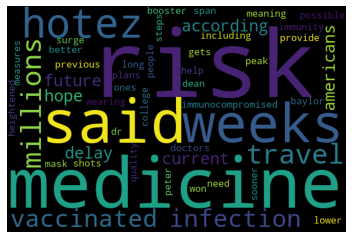

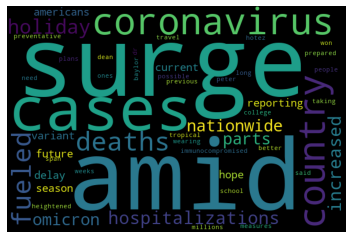

In [24]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
for i, component in enumerate(VT):
  term_comp = zip(terms, component)
  sorted_terms = sorted(term_comp, key= lambda x:x[1], reverse=True)[:50]
  imp_words_topic=""
  for term in sorted_terms:
    imp_words_topic= imp_words_topic + " " + term[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()